In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import warnings
warnings.filterwarnings('ignore')

In [6]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty):
  fig = plt.figure( facecolor='y', edgecolor='k')
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Categorical Crossentropy Loss')
  plt.legend()
  plt.grid()
  plt.show()

**3 Covnets with 3X3 Kernels**

In [63]:
import warnings
warnings.filterwarnings("ignore")

from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_78 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
dropout_74 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_79 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 22, 22, 128)       73856     
_________________________________________________________________
batch_normalization_80 (Batc (None, 22, 22, 128)       512       
__________

In [64]:
model.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
model_history=model.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 30s 499us/step - loss: 0.1521 - acc: 0.9549 - val_loss: 0.0518 - val_acc: 0.9816
Epoch 2/12
60000/60000 [==============================] - 25s 423us/step - loss: 0.0623 - acc: 0.9815 - val_loss: 0.0375 - val_acc: 0.9872
Epoch 3/12
60000/60000 [==============================] - 25s 423us/step - loss: 0.0478 - acc: 0.9851 - val_loss: 0.0324 - val_acc: 0.9886
Epoch 4/12
60000/60000 [==============================] - 25s 422us/step - loss: 0.0382 - acc: 0.9883 - val_loss: 0.0252 - val_acc: 0.9916
Epoch 5/12
60000/60000 [==============================] - 25s 422us/step - loss: 0.0331 - acc: 0.9897 - val_loss: 0.0253 - val_acc: 0.9911
Epoch 6/12
60000/60000 [==============================] - 25s 422us/step - loss: 0.0271 - acc: 0.9912 - val_loss: 0.0212 - val_acc: 0.9936
Epoch 7/12
60000/60000 [==============================] - 25s 421us/step - loss: 0.0251 - acc: 0.9921 - val_loss: 0.

test score : 0.025529245845030163
test sccuracy : 0.9926


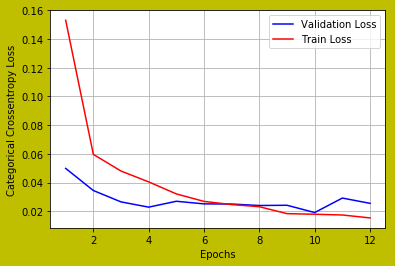

In [10]:
score=model.evaluate(x_test,y_test,verbose=0)
test_score3=score[0]
test_accuracy3=score[1]
train_accuracy3=max(model_history.history['acc'])
print('test score :',test_score3)
print('test sccuracy :',test_accuracy3)
# error plot
x=list(range(1,epochs+1))
vy=model_history.history['val_loss'] #validation loss
ty=model_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

**Kernel Size of 5X5 and 5 Covnets**

In [11]:
from keras.initializers import he_normal
convnet5=Sequential() # Initializing the model

# First ConvNet
convnet5.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape))

convnet5.add(Conv2D(64,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#Second Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

convnet5.add(Conv2D(96,kernel_size=(5,5),
                    padding='same',
                   activation='relu'))  # 3rd ConvNet
#maxpooling by (2,2 ) ,dropout,flattening
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

convnet5.add(Conv2D(128,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#fourth Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))
convnet5.add(Conv2D(164,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#fifth Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))
convnet5.add(Flatten())

#hidden_layer
convnet5.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet5.add(BatchNormalization())
convnet5.add(Dropout(0.5))
convnet5.add(Dense(num_classes,activation='softmax'))
print(convnet5.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 96)        153696    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 96)          0         
__________

In [12]:
convnet5.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet5_history=convnet5.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 24s 406us/step - loss: 0.2990 - acc: 0.9031 - val_loss: 0.0502 - val_acc: 0.9850
Epoch 2/12
60000/60000 [==============================] - 22s 373us/step - loss: 0.0690 - acc: 0.9800 - val_loss: 0.0355 - val_acc: 0.9897
Epoch 3/12
60000/60000 [==============================] - 22s 373us/step - loss: 0.0510 - acc: 0.9855 - val_loss: 0.0317 - val_acc: 0.9908
Epoch 4/12
60000/60000 [==============================] - 22s 373us/step - loss: 0.0418 - acc: 0.9879 - val_loss: 0.0308 - val_acc: 0.9909
Epoch 5/12
60000/60000 [==============================] - 22s 373us/step - loss: 0.0333 - acc: 0.9906 - val_loss: 0.0227 - val_acc: 0.9929
Epoch 6/12
60000/60000 [==============================] - 22s 373us/step - loss: 0.0322 - acc: 0.9904 - val_loss: 0.0239 - val_acc: 0.9922
Epoch 7/12
60000/60000 [==============================] - 22s 373us/step - loss: 0.0267 - acc: 0.9923 - val_loss: 0.

test score : 0.01828602675205384
test Accuracy : 0.9953


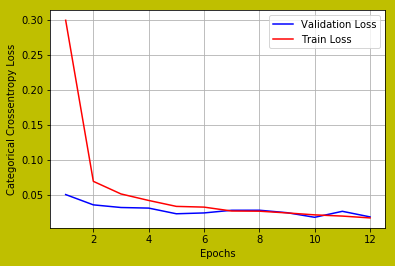

In [13]:
score=convnet5.evaluate(x_test,y_test,verbose=0)
test_score5=score[0]
test_accuracy5=score[1]
train_accuracy5=max(convnet5_history.history['acc'])
print('test score :',test_score5)
print('test Accuracy :',test_accuracy5)
# error plot
x=list(range(1,epochs+1))
vy=convnet5_history.history['val_loss'] #validation loss
ty=convnet5_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

**Kernel Size of 2X2 and 7 Covnets**

In [14]:
convnet7=Sequential() # Initializing the model

# First ConvNet
convnet7.add(Conv2D(16,kernel_size=(2,2),
                    activation='relu',
                    padding='same',strides=(1,1),
                    input_shape=input_shape))


convnet7.add(Conv2D(32,kernel_size=(2,2),
                    padding='same',strides=(2,2),
                    activation='relu'))


convnet7.add(Conv2D(64,kernel_size=(2,2),
                    padding='same',
                   activation='relu'))  

convnet7.add(Dropout(0.15))

convnet7.add(Conv2D(96,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.39))
convnet7.add(Conv2D(128,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.3))
convnet7.add(Conv2D(164,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))
convnet7.add(Conv2D(164,kernel_size=(2,2),
                    padding='same',strides=(1,1),
                    activation='relu'))

convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.4))
convnet7.add(Flatten())

convnet7.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(148,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(128,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(num_classes,activation='softmax'))
print(convnet7.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 96)        24672     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 96)          0         
__________

In [15]:
convnet7.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet7_history=convnet7.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 19s 312us/step - loss: 1.9766 - acc: 0.3500 - val_loss: 1.6371 - val_acc: 0.4100
Epoch 2/12
60000/60000 [==============================] - 16s 269us/step - loss: 0.5426 - acc: 0.8284 - val_loss: 0.1406 - val_acc: 0.9629
Epoch 3/12
60000/60000 [==============================] - 16s 269us/step - loss: 0.2123 - acc: 0.9442 - val_loss: 0.0581 - val_acc: 0.9854
Epoch 4/12
60000/60000 [==============================] - 16s 270us/step - loss: 0.1477 - acc: 0.9626 - val_loss: 0.0465 - val_acc: 0.9882
Epoch 5/12
60000/60000 [==============================] - 16s 269us/step - loss: 0.1202 - acc: 0.9689 - val_loss: 0.0468 - val_acc: 0.9886
Epoch 6/12
60000/60000 [==============================] - 16s 269us/step - loss: 0.1006 - acc: 0.9748 - val_loss: 0.0490 - val_acc: 0.9876
Epoch 7/12
60000/60000 [==============================] - 16s 268us/step - loss: 0.0905 - acc: 0.9767 - val_loss: 0.

test score : 0.02905204060471151
test Accuracy : 0.9933


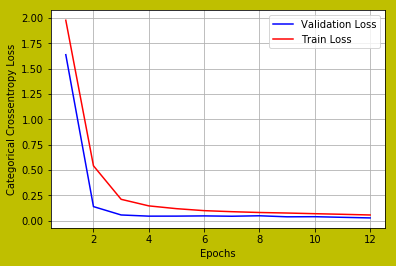

In [16]:
score=convnet7.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(convnet7_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=convnet7_history.history['val_loss'] #validation loss
ty=convnet7_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

**3 Covnet with 3X3 kernels and no Batch Normalization and Dropouts and Sigmoid Activation and SGD optimizer**

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(Conv2D(128,kernel_size=(3,3),activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1982592   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total para

In [24]:
model.compile(optimizer=keras.optimizers.SGD(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
model_history=model.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 284us/step - loss: 2.3092 - acc: 0.1040 - val_loss: 2.3091 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 16s 259us/step - loss: 2.3062 - acc: 0.1057 - val_loss: 2.3023 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 16s 260us/step - loss: 2.3043 - acc: 0.1054 - val_loss: 2.3050 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 16s 260us/step - loss: 2.3033 - acc: 0.1088 - val_loss: 2.3032 - val_acc: 0.1028
Epoch 5/12
60000/60000 [==============================] - 16s 259us/step - loss: 2.3029 - acc: 0.1091 - val_loss: 2.3033 - val_acc: 0.0980
Epoch 6/12
60000/60000 [==============================] - 16s 259us/step - loss: 2.3026 - acc: 0.1085 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 16s 259us/step - loss: 2.3027 - acc: 0.1090 - val_loss: 2.

test score : 2.3011483032226563
test Accuracy : 0.1135


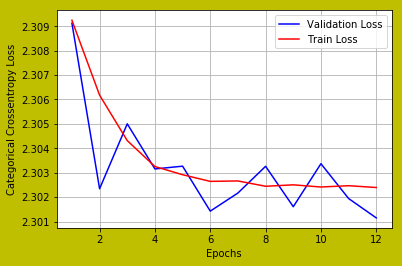

In [25]:
score=model.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(model_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=model_history.history['val_loss'] #validation loss
ty=model_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

**3 Covnet with only Batch Normalization and Sigmoid Activation and SGD optimizer**

In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 11, 11, 128)       512       
__________

In [28]:
model.compile(optimizer=keras.optimizers.SGD(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
model_history=model.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 21s 356us/step - loss: 0.2023 - acc: 0.9433 - val_loss: 0.1070 - val_acc: 0.9713
Epoch 2/12
60000/60000 [==============================] - 19s 320us/step - loss: 0.0896 - acc: 0.9772 - val_loss: 0.0804 - val_acc: 0.9787
Epoch 3/12
60000/60000 [==============================] - 19s 319us/step - loss: 0.0637 - acc: 0.9848 - val_loss: 0.0659 - val_acc: 0.9828
Epoch 4/12
60000/60000 [==============================] - 19s 319us/step - loss: 0.0501 - acc: 0.9880 - val_loss: 0.0555 - val_acc: 0.9843
Epoch 5/12
60000/60000 [==============================] - 19s 319us/step - loss: 0.0411 - acc: 0.9904 - val_loss: 0.0500 - val_acc: 0.9858
Epoch 6/12
60000/60000 [==============================] - 19s 318us/step - loss: 0.0353 - acc: 0.9923 - val_loss: 0.0484 - val_acc: 0.9867
Epoch 7/12
60000/60000 [==============================] - 19s 319us/step - loss: 0.0303 - acc: 0.9940 - val_loss: 0.

test score : 0.04180127617139369
test Accuracy : 0.9868


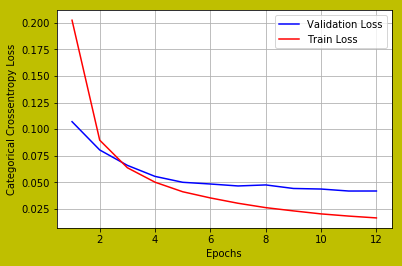

In [29]:
score=model.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(model_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=model_history.history['val_loss'] #validation loss
ty=model_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

**3 Covnet with Batch Normalization and Dropout and Sigmoid Activation and SGD optimizer and Stride**

In [35]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),strides=(2,2), activation='sigmoid',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(128,kernel_size=(3,3),strides=(2, 2), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 13, 13, 32)        320       
_________________________________________________________________
batch_normalization_31 (Batc (None, 13, 13, 32)        128       
_________________________________________________________________
dropout_31 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_32 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
dropout_32 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 5, 5, 128)         73856     
__________

In [36]:
model.compile(optimizer=keras.optimizers.SGD(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
model_history=model.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 204us/step - loss: 1.8077 - acc: 0.3978 - val_loss: 0.7481 - val_acc: 0.7777
Epoch 2/12
60000/60000 [==============================] - 9s 145us/step - loss: 1.0312 - acc: 0.6652 - val_loss: 0.5252 - val_acc: 0.8340
Epoch 3/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.8036 - acc: 0.7428 - val_loss: 0.4223 - val_acc: 0.8688
Epoch 4/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.6884 - acc: 0.7813 - val_loss: 0.3620 - val_acc: 0.8887
Epoch 5/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.6011 - acc: 0.8108 - val_loss: 0.3198 - val_acc: 0.9018
Epoch 6/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.5381 - acc: 0.8302 - val_loss: 0.2872 - val_acc: 0.9096
Epoch 7/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.4900 - acc: 0.8468 - val_loss: 0.2612 -

test score : 0.18218094048649072
test Accuracy : 0.9426


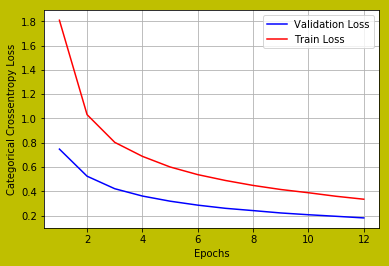

In [37]:
score=model.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(model_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=model_history.history['val_loss'] #validation loss
ty=model_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

**5 Covnet with No Batch Normalization, Dropouts and Sigmoid activation with SGD optimizer**

In [39]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',
                 input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(Conv2D(128,kernel_size=(3,3),activation='sigmoid'))
model.add(Conv2D(128,kernel_size=(3,3),activation='sigmoid'))
model.add(Conv2D(128,kernel_size=(3,3),activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 20, 20, 128)       147584    
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 18, 18, 128)       147584    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 9, 9, 128)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 10368)             0         
__________

In [40]:
model.compile(optimizer=keras.optimizers.SGD(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
model_history=model.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 34s 574us/step - loss: 2.3078 - acc: 0.1064 - val_loss: 2.3055 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 32s 528us/step - loss: 2.3054 - acc: 0.1071 - val_loss: 2.3030 - val_acc: 0.1028
Epoch 3/12
60000/60000 [==============================] - 31s 524us/step - loss: 2.3046 - acc: 0.1053 - val_loss: 2.3047 - val_acc: 0.1010
Epoch 4/12
60000/60000 [==============================] - 32s 525us/step - loss: 2.3045 - acc: 0.1077 - val_loss: 2.3028 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 31s 525us/step - loss: 2.3037 - acc: 0.1069 - val_loss: 2.3021 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 31s 523us/step - loss: 2.3034 - acc: 0.1064 - val_loss: 2.3031 - val_acc: 0.1010
Epoch 7/12
60000/60000 [==============================] - 31s 524us/step - loss: 2.3031 - acc: 0.1083 - val_loss: 2.

test score : 2.3019299713134767
test Accuracy : 0.1135


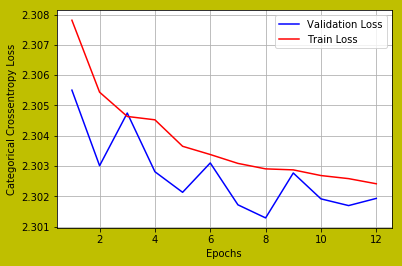

In [41]:
score=model.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(model_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=model_history.history['val_loss'] #validation loss
ty=model_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

**5 Covnet with Batch Normalization, Dropout and Sigmoid Activation and SGD optimizer and Strides**

In [49]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),strides=(2,2), activation='sigmoid',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(3, 3),activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(128,kernel_size=(3,3),strides=(2, 2), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 13, 13, 32)        320       
_________________________________________________________________
batch_normalization_46 (Batc (None, 13, 13, 32)        128       
_________________________________________________________________
dropout_45 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_47 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
dropout_46 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 9, 9, 64)          36928     
__________

In [50]:
model.compile(optimizer=keras.optimizers.SGD(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
model_history=model.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 18s 306us/step - loss: 1.3384 - acc: 0.5657 - val_loss: 0.4821 - val_acc: 0.8523
Epoch 2/12
60000/60000 [==============================] - 14s 237us/step - loss: 0.6662 - acc: 0.7949 - val_loss: 0.3367 - val_acc: 0.8951
Epoch 3/12
60000/60000 [==============================] - 14s 238us/step - loss: 0.5221 - acc: 0.8385 - val_loss: 0.2752 - val_acc: 0.9132
Epoch 4/12
60000/60000 [==============================] - 14s 237us/step - loss: 0.4407 - acc: 0.8622 - val_loss: 0.2332 - val_acc: 0.9260
Epoch 5/12
60000/60000 [==============================] - 14s 237us/step - loss: 0.3911 - acc: 0.8775 - val_loss: 0.2070 - val_acc: 0.9354
Epoch 6/12
60000/60000 [==============================] - 14s 237us/step - loss: 0.3480 - acc: 0.8921 - val_loss: 0.1889 - val_acc: 0.9407
Epoch 7/12
60000/60000 [==============================] - 14s 237us/step - loss: 0.3189 - acc: 0.9003 - val_loss: 0.

test score : 0.12591462984122337
test Accuracy : 0.961


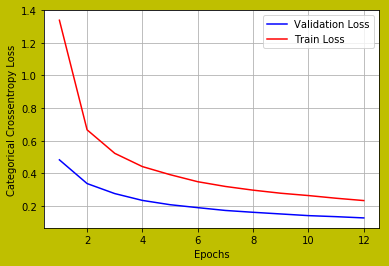

In [51]:
score=model.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(model_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=model_history.history['val_loss'] #validation loss
ty=model_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

**7 Covnet with batch normalization and Dropout with Sigmoid activation and SGD optimizer with Strides**

In [55]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),strides=(2,2), activation='sigmoid',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(3, 3),activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(128,kernel_size=(3,3),strides=(2, 2), activation='sigmoid'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 13, 13, 32)        320       
_________________________________________________________________
batch_normalization_70 (Batc (None, 13, 13, 32)        128       
_________________________________________________________________
dropout_67 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_71 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
dropout_68 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 9, 9, 64)          36928     
__________

In [56]:
model.compile(optimizer=keras.optimizers.SGD(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
model_history=model.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 22s 369us/step - loss: 0.8240 - acc: 0.7353 - val_loss: 0.3630 - val_acc: 0.8900
Epoch 2/12
60000/60000 [==============================] - 17s 286us/step - loss: 0.4815 - acc: 0.8532 - val_loss: 0.2840 - val_acc: 0.9144
Epoch 3/12
60000/60000 [==============================] - 17s 286us/step - loss: 0.4042 - acc: 0.8782 - val_loss: 0.2346 - val_acc: 0.9284
Epoch 4/12
60000/60000 [==============================] - 17s 285us/step - loss: 0.3517 - acc: 0.8921 - val_loss: 0.2035 - val_acc: 0.9378
Epoch 5/12
60000/60000 [==============================] - 17s 285us/step - loss: 0.3173 - acc: 0.9027 - val_loss: 0.1815 - val_acc: 0.9425
Epoch 6/12
60000/60000 [==============================] - 17s 288us/step - loss: 0.2840 - acc: 0.9115 - val_loss: 0.1551 - val_acc: 0.9516
Epoch 7/12
60000/60000 [==============================] - 17s 286us/step - loss: 0.2581 - acc: 0.9216 - val_loss: 0.

test score : 0.09424485847707838
test Accuracy : 0.9692


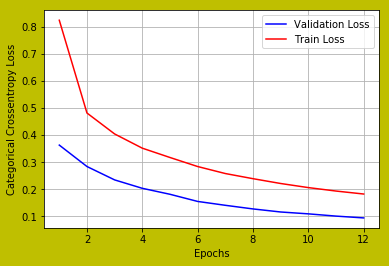

In [57]:
score=model.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(model_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=model_history.history['val_loss'] #validation loss
ty=model_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

**4 Covnets with Dropouts, Batch Normalization, SGD Optimizer and Sigmoid Activation with Strides**

In [65]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),strides=(2,2), activation='sigmoid',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(3, 3),activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128,kernel_size=(3,3),strides=(2, 2), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_104 (Conv2D)          (None, 13, 13, 32)        320       
_________________________________________________________________
batch_normalization_82 (Batc (None, 13, 13, 32)        128       
_________________________________________________________________
dropout_77 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_83 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
dropout_78 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 9, 9, 64)          36928     
__________

In [66]:
model.compile(optimizer=keras.optimizers.SGD(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
model_history=model.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 18s 294us/step - loss: 1.1670 - acc: 0.6206 - val_loss: 0.3591 - val_acc: 0.8875
Epoch 2/12
60000/60000 [==============================] - 13s 212us/step - loss: 0.5246 - acc: 0.8358 - val_loss: 0.2440 - val_acc: 0.9241
Epoch 3/12
60000/60000 [==============================] - 13s 209us/step - loss: 0.4063 - acc: 0.8739 - val_loss: 0.1956 - val_acc: 0.9384
Epoch 4/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.3459 - acc: 0.8930 - val_loss: 0.1674 - val_acc: 0.9462
Epoch 5/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.3024 - acc: 0.9057 - val_loss: 0.1489 - val_acc: 0.9519
Epoch 6/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.2770 - acc: 0.9132 - val_loss: 0.1339 - val_acc: 0.9573
Epoch 7/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.2539 - acc: 0.9198 - val_loss: 0.

test score : 0.09062021687589586
test Accuracy : 0.9706


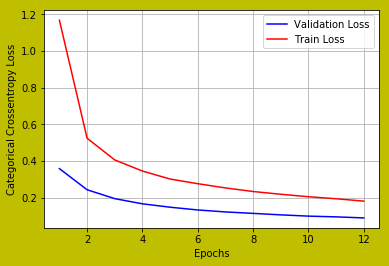

In [67]:
score=model.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(model_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=model_history.history['val_loss'] #validation loss
ty=model_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

**2 Covnets with  Dropouts, Batch Normalization, SGD Optimizer and Sigmoid Activation with Strides**

In [68]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),strides=(2,2), activation='sigmoid',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128,kernel_size=(3,3),strides=(2, 2), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_108 (Conv2D)          (None, 13, 13, 32)        320       
_________________________________________________________________
batch_normalization_87 (Batc (None, 13, 13, 32)        128       
_________________________________________________________________
dropout_81 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 6, 6, 128)         36992     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_82 (Dropout)         (None, 3, 3, 128)         0         
_________________________________________________________________
batch_normalization_88 (Batc (None, 3, 3, 128)         512       
__________

In [69]:
model.compile(optimizer=keras.optimizers.SGD(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
model_history=model.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 191us/step - loss: 1.1717 - acc: 0.6134 - val_loss: 0.4258 - val_acc: 0.8693
Epoch 2/12
60000/60000 [==============================] - 7s 116us/step - loss: 0.5661 - acc: 0.8194 - val_loss: 0.3031 - val_acc: 0.9066
Epoch 3/12
60000/60000 [==============================] - 7s 114us/step - loss: 0.4468 - acc: 0.8592 - val_loss: 0.2534 - val_acc: 0.9219
Epoch 4/12
60000/60000 [==============================] - 7s 114us/step - loss: 0.3902 - acc: 0.8777 - val_loss: 0.2240 - val_acc: 0.9294
Epoch 5/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.3505 - acc: 0.8908 - val_loss: 0.1982 - val_acc: 0.9389
Epoch 6/12
60000/60000 [==============================] - 7s 114us/step - loss: 0.3223 - acc: 0.8990 - val_loss: 0.1817 - val_acc: 0.9432
Epoch 7/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.2996 - acc: 0.9077 - val_loss: 0.1655 -

test score : 0.12283125995770097
test Accuracy : 0.9601


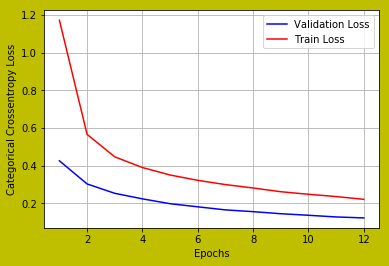

In [70]:
score=model.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(model_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=model_history.history['val_loss'] #validation loss
ty=model_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

In [71]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["No of CovNets","Batch Normalization","Activation","Dropout","Optimizer","Training Accuracy","Test Accuracy","Strides"]
x.add_row(["3","yes","relu","yes","Adam","99.53","99.32","No"])
x.add_row(["5","yes","relu","yes","Adam","99.55","99.39","No"])
x.add_row(["7","yes","relu","yes","Adam","98.44","99.23","No"])
x.add_row(["3","no","sigmoid","no","SGD","10.39","11.35","No"])
x.add_row(["3","yes","sigmoid","no","SGD","99.79","98.68","No"])
x.add_row(["3","yes","sigmoid","yes","SGD","89.57","94.26","yes"])
x.add_row(["5","no","sigmoid","no","SGD","10.99","11.35","No"])
x.add_row(["5","yes","sigmoid","yes","SGD","92.73","96.10","Yes"])
x.add_row(["7","yes","sigmoid","yes","SGD","94.35","96.92","yes"])
x.add_row(["4","yes","sigmoid","yes","SGD","94.38","97.06","yes"])
x.add_row(["2","yes","sigmoid","yes","SGD","93.4","96.01","yes"])
print(x)

+---------------+---------------------+------------+---------+-----------+-------------------+---------------+---------+
| No of CovNets | Batch Normalization | Activation | Dropout | Optimizer | Training Accuracy | Test Accuracy | Strides |
+---------------+---------------------+------------+---------+-----------+-------------------+---------------+---------+
|       3       |         yes         |    relu    |   yes   |    Adam   |       99.53       |     99.32     |    No   |
|       5       |         yes         |    relu    |   yes   |    Adam   |       99.55       |     99.39     |    No   |
|       7       |         yes         |    relu    |   yes   |    Adam   |       98.44       |     99.23     |    No   |
|       3       |          no         |  sigmoid   |    no   |    SGD    |       10.39       |     11.35     |    No   |
|       3       |         yes         |  sigmoid   |    no   |    SGD    |       99.79       |     98.68     |    No   |
|       3       |         yes   

**Conclusion**

1. All the models are build using MNIST dataset
2. The Training accuracy and the Test Accuracy for all the models are very good with the highest for 5 Covnets with relu acitvation and Adam Optimizer and using Batch Normalization and Droputs.
3. The models with no Batch Normalization and Dropouts with SGD Optimizer and Sigmoid activation has the lowest testing and training accuracy for both 5 Layer Covnet and 3 layer Covnet
4. The performance of all the models except the ones describe above is good with all test accuracies more than 90.
5. The usage of Strides didnot increase the performance of the models
6. Overall Sigmoid activation and SGD Optimizer is giving better performance
7. Batch Normalization and Dropouts have significant effect on the performance of the modes